In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px

from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Conv2D, Input, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

train = pd.read_csv('./input/fashion-mnist_train.csv')
test = pd.read_csv('./input/fashion-mnist_test.csv')

X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

X_train = X_train.values
X_test = X_test.values

#Reshape the data inorder to fit to our model
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)

X_train = X_train / 255
X_test = X_test / 255

X_train = np.array(X_train)
X_test = np.array(X_test)
X_test

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.01568627, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.00392157, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [9]:
import time

start = time.time()

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

inputs = Input((28, 28, 1))

x = Conv2D(filters=32, kernel_size=5, strides=1, activation='relu',
           kernel_regularizer=tf.keras.regularizers.l2(0.0005))(inputs)
x = Conv2D(filters=32, kernel_size=5, strides=1, use_bias=False, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(strides=2)(x)
x = Dropout(0.3)(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = Conv2D(filters=64, kernel_size=3, strides=1, use_bias=False, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(strides=2)(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(units=256, use_bias=False, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(units=128, use_bias=False, kernel_regularizer=l2(0.0005), activation='relu')(x)
x = BatchNormalization()(x)

x1 = Dense(units=84, use_bias=False, kernel_regularizer=l2(0.0005), activation='relu')(x)
x = BatchNormalization()(x1)
x2 = Dropout(0.3)(x)
x = tf.keras.layers.Add()([x1, x2])

outputs = Dense(units=10, activation='softmax')(x)
cnn_model = Model(inputs=inputs, outputs=outputs)

cnn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())
history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[callback])

print('(Fit: Done in {:.2f} min)'.format((time.time() - start)/60))


Epoch 1/50


2023-03-13 13:46:40.800323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.7997 - accuracy: 0.7664

2023-03-13 13:47:37.544842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 64s 34ms/step - loss: 0.7997 - accuracy: 0.7664 - val_loss: 0.5337 - val_accuracy: 0.8508 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 63s 33ms/step - loss: 0.5219 - accuracy: 0.8502 - val_loss: 0.4456 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 3/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4449 - accuracy: 0.8670 - val_loss: 0.3538 - val_accuracy: 0.8967 - lr: 0.0010
Epoch 4/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3972 - accuracy: 0.8785 - val_loss: 0.3459 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 5/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3724 - accuracy: 0.8876 - val_loss: 0.3219 - val_accuracy: 0.9061 - lr: 0.0010
Epoch 6/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3523 - accuracy: 0.8924 - val_loss: 0.3325 - val_accuracy: 0.8964 - lr: 0.0010
Epoch 7/50
1875/1875 [==============================] - 6

In [15]:

start = time.time()

history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[callback])

print('(Fit: Done in {:.2f} min)'.format((time.time() - start)/60))


Epoch 1/50
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1142 - accuracy: 0.9660 - val_loss: 0.2179 - val_accuracy: 0.9380 - lr: 1.8316e-05
Epoch 2/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1128 - accuracy: 0.9668 - val_loss: 0.2190 - val_accuracy: 0.9369 - lr: 1.8316e-05
Epoch 3/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1121 - accuracy: 0.9668 - val_loss: 0.2189 - val_accuracy: 0.9381 - lr: 1.8316e-05
Epoch 4/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1119 - accuracy: 0.9668 - val_loss: 0.2192 - val_accuracy: 0.9381 - lr: 1.8316e-05
Epoch 5/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1110 - accuracy: 0.9665 - val_loss: 0.2195 - val_accuracy: 0.9379 - lr: 1.8316e-05
Epoch 6/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 0.2198 - val_accuracy: 0.9379 - lr: 1.8316e-05
Epoch 7/50
1875/1875 [

313/313 [==============================] - 6s 18ms/step - loss: 0.2231 - accuracy: 0.9374
>>>> Test Loss : 0.2231
>>>> Test Accuracy : 0.9374


(Evaluate & Report: Done in 6.27 s)


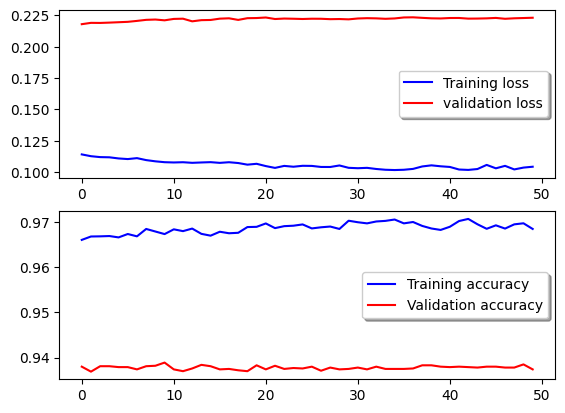

In [16]:
import time

start = time.time()
score = cnn_model.evaluate(X_test, y_test, verbose=1)

print('===========================')
print('>>>> Test Loss : {:.4f}'.format(score[0]))
print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
print('===========================\n\n')

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

print('(Evaluate & Report: Done in {:.2f} s)'.format((time.time() - start)))


In [17]:
import joblib

filename = "cnn-model04.joblib"
joblib.dump(cnn_model, filename)

print("Model saved.")

INFO:tensorflow:Assets written to: ram://f18fda39-4dc1-4b66-b8df-74c86f158aa4/assets


INFO:tensorflow:Assets written to: ram://f18fda39-4dc1-4b66-b8df-74c86f158aa4/assets


Model saved.


In [18]:
def prep_submissions(preds_array, file_name='submission.csv'):
    preds_df = pd.DataFrame(preds_array)
    predicted_labels = preds_df.idxmax(axis=1) #convert back one hot encoding to categorical variabless
    return predicted_labels

test_preds = cnn_model.predict(X_test)
test_preds_labels = prep_submissions(test_preds)
test_preds_labels.to_csv("submission.csv")

test_preds_labels

313/313 [==============================] - 1s 4ms/step


0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Length: 10000, dtype: int64